In [32]:
import geopandas as gpd
import gspatial_plot as gsp
import pandas as pd

In [4]:
states = gpd.read_file("us_states.geojson")

In [5]:
states = states[
    ~states["NAME"].isin(
        [
            "Guam",
            "American Samoa",
            "Commonwealth of the Northern Mariana Islands",
            "Alaska",
            "Hawaii"
        ]
    )
]

In [6]:
fires = gpd.read_file("Monitoring_Trends_in_Burn_Severity _Fire_Occurrence_Locations_and_Burned_Area_Boundaries.geojson")

In [7]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"MULTIPOLYGON (((-96.62188 42.77925, -96.57794 ..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.77379 39.72220, -75.75323 ..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"MULTIPOLYGON (((-80.51989 40.90666, -80.51964 ..."


In [8]:
states.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
fires.head()

,OBJECTID,FIRE_ID,ASMNT_TYPE,PRE_ID,POST_ID,NODATA_THRESHOLD,LOW_THRESHOLD,MODERATE_THRESHOLD,HIGH_THRESHOLD,LATITUDE,...,IG_DATE,ACRES,IRWINID,MAP_ID,MAP_PROG,PERIM_ID,DNBR_OFFST,DNBR_STDDV,COMMENTS,geometry
0,526496,AL3276508694720210320,Initial,802003720210313,802003720210329,-970,70,9999,9999,32.776,...,2021-03-20 00:00:00+00:00,1966,F512DED1-3A47-40F9-AA5C-AA8ECB5555E5,10021865,MTBS,NaN,34,17,NaN,POINT (-86.94711 32.77450)
1,526497,AL3279308700220211120,Initial,B16SDB20211115_30m,A16SDB20211123_30m,-970,80,9999,9999,32.785,...,2021-11-20 00:00:00+00:00,578,D7A20B61-04AA-42FE-ABCA-865F129167EE,10022026,MTBS,NaN,65,31,AL3277908698120211116 is a duplicate of this f...,POINT (-87.00658 32.78629)
2,526498,AL3290408705120210321,Initial,B16SDB20210320_30m,B16SDB20210402_30m,-970,10,9999,9999,32.911,...,2021-03-21 00:00:00+00:00,1313,9ECE2635-8788-4E37-91A7-82FA3C45EEEA,10021855,MTBS,NaN,-12,20,NaN,POINT (-87.05778 32.90670)
3,526499,AL3314708607620210419,Initial,A16SEB20200509_30m,B16SEB20210509_30m,-970,20,9999,9999,33.151,...,2021-04-19 00:00:00+00:00,1826,E18DFB2D-271E-4ECE-953A-B7BC5CFE6718,10021921,MTBS,NaN,-8,15,NaN,POINT (-86.08856 33.14911)
4,526500,AL3315508618420211119,Initial,B16SEB20201120_30m,B16SEB20211125_30m,-970,90,9999,9999,33.156,...,2021-11-19 00:00:00+00:00,670,CB27E9BA-2B5D-4128-B92B-A38AE1246C81,10021983,MTBS,NaN,25,31,NaN,POINT (-86.18762 33.15883)


In [10]:
fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

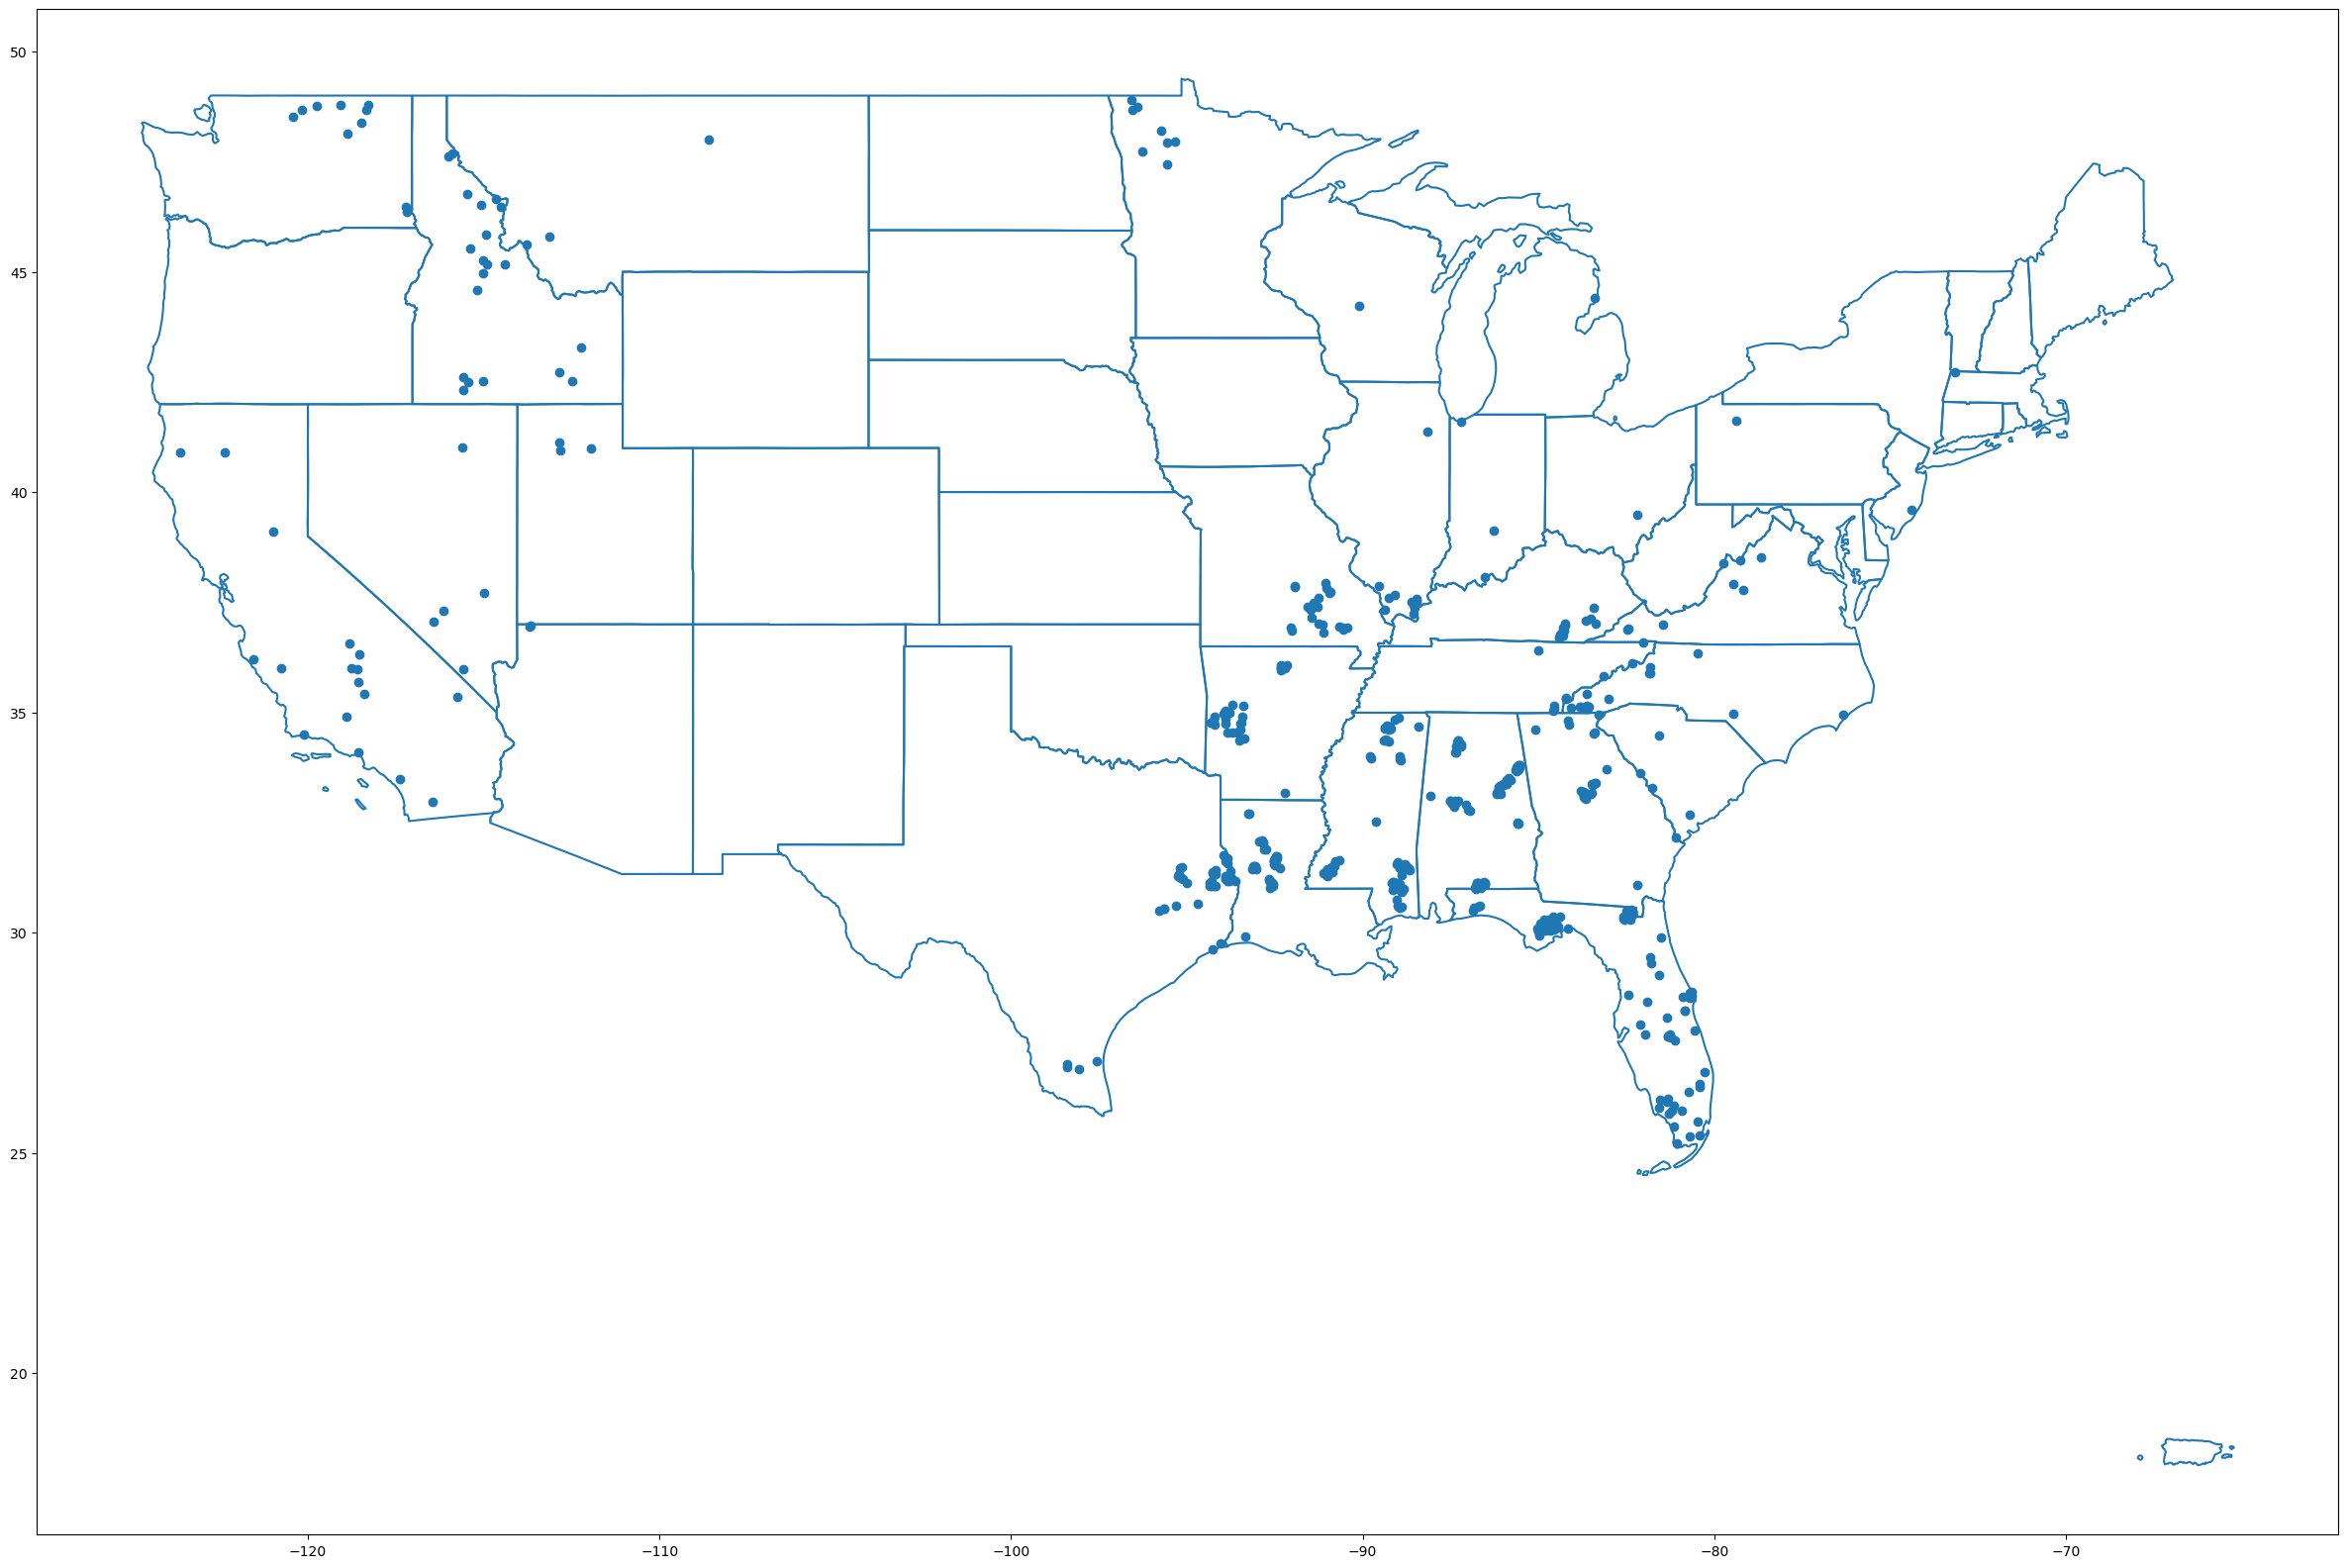

In [11]:
ax = states.boundary.plot(figsize=(30,30))
fires.plot(ax=ax)

<Axes: >

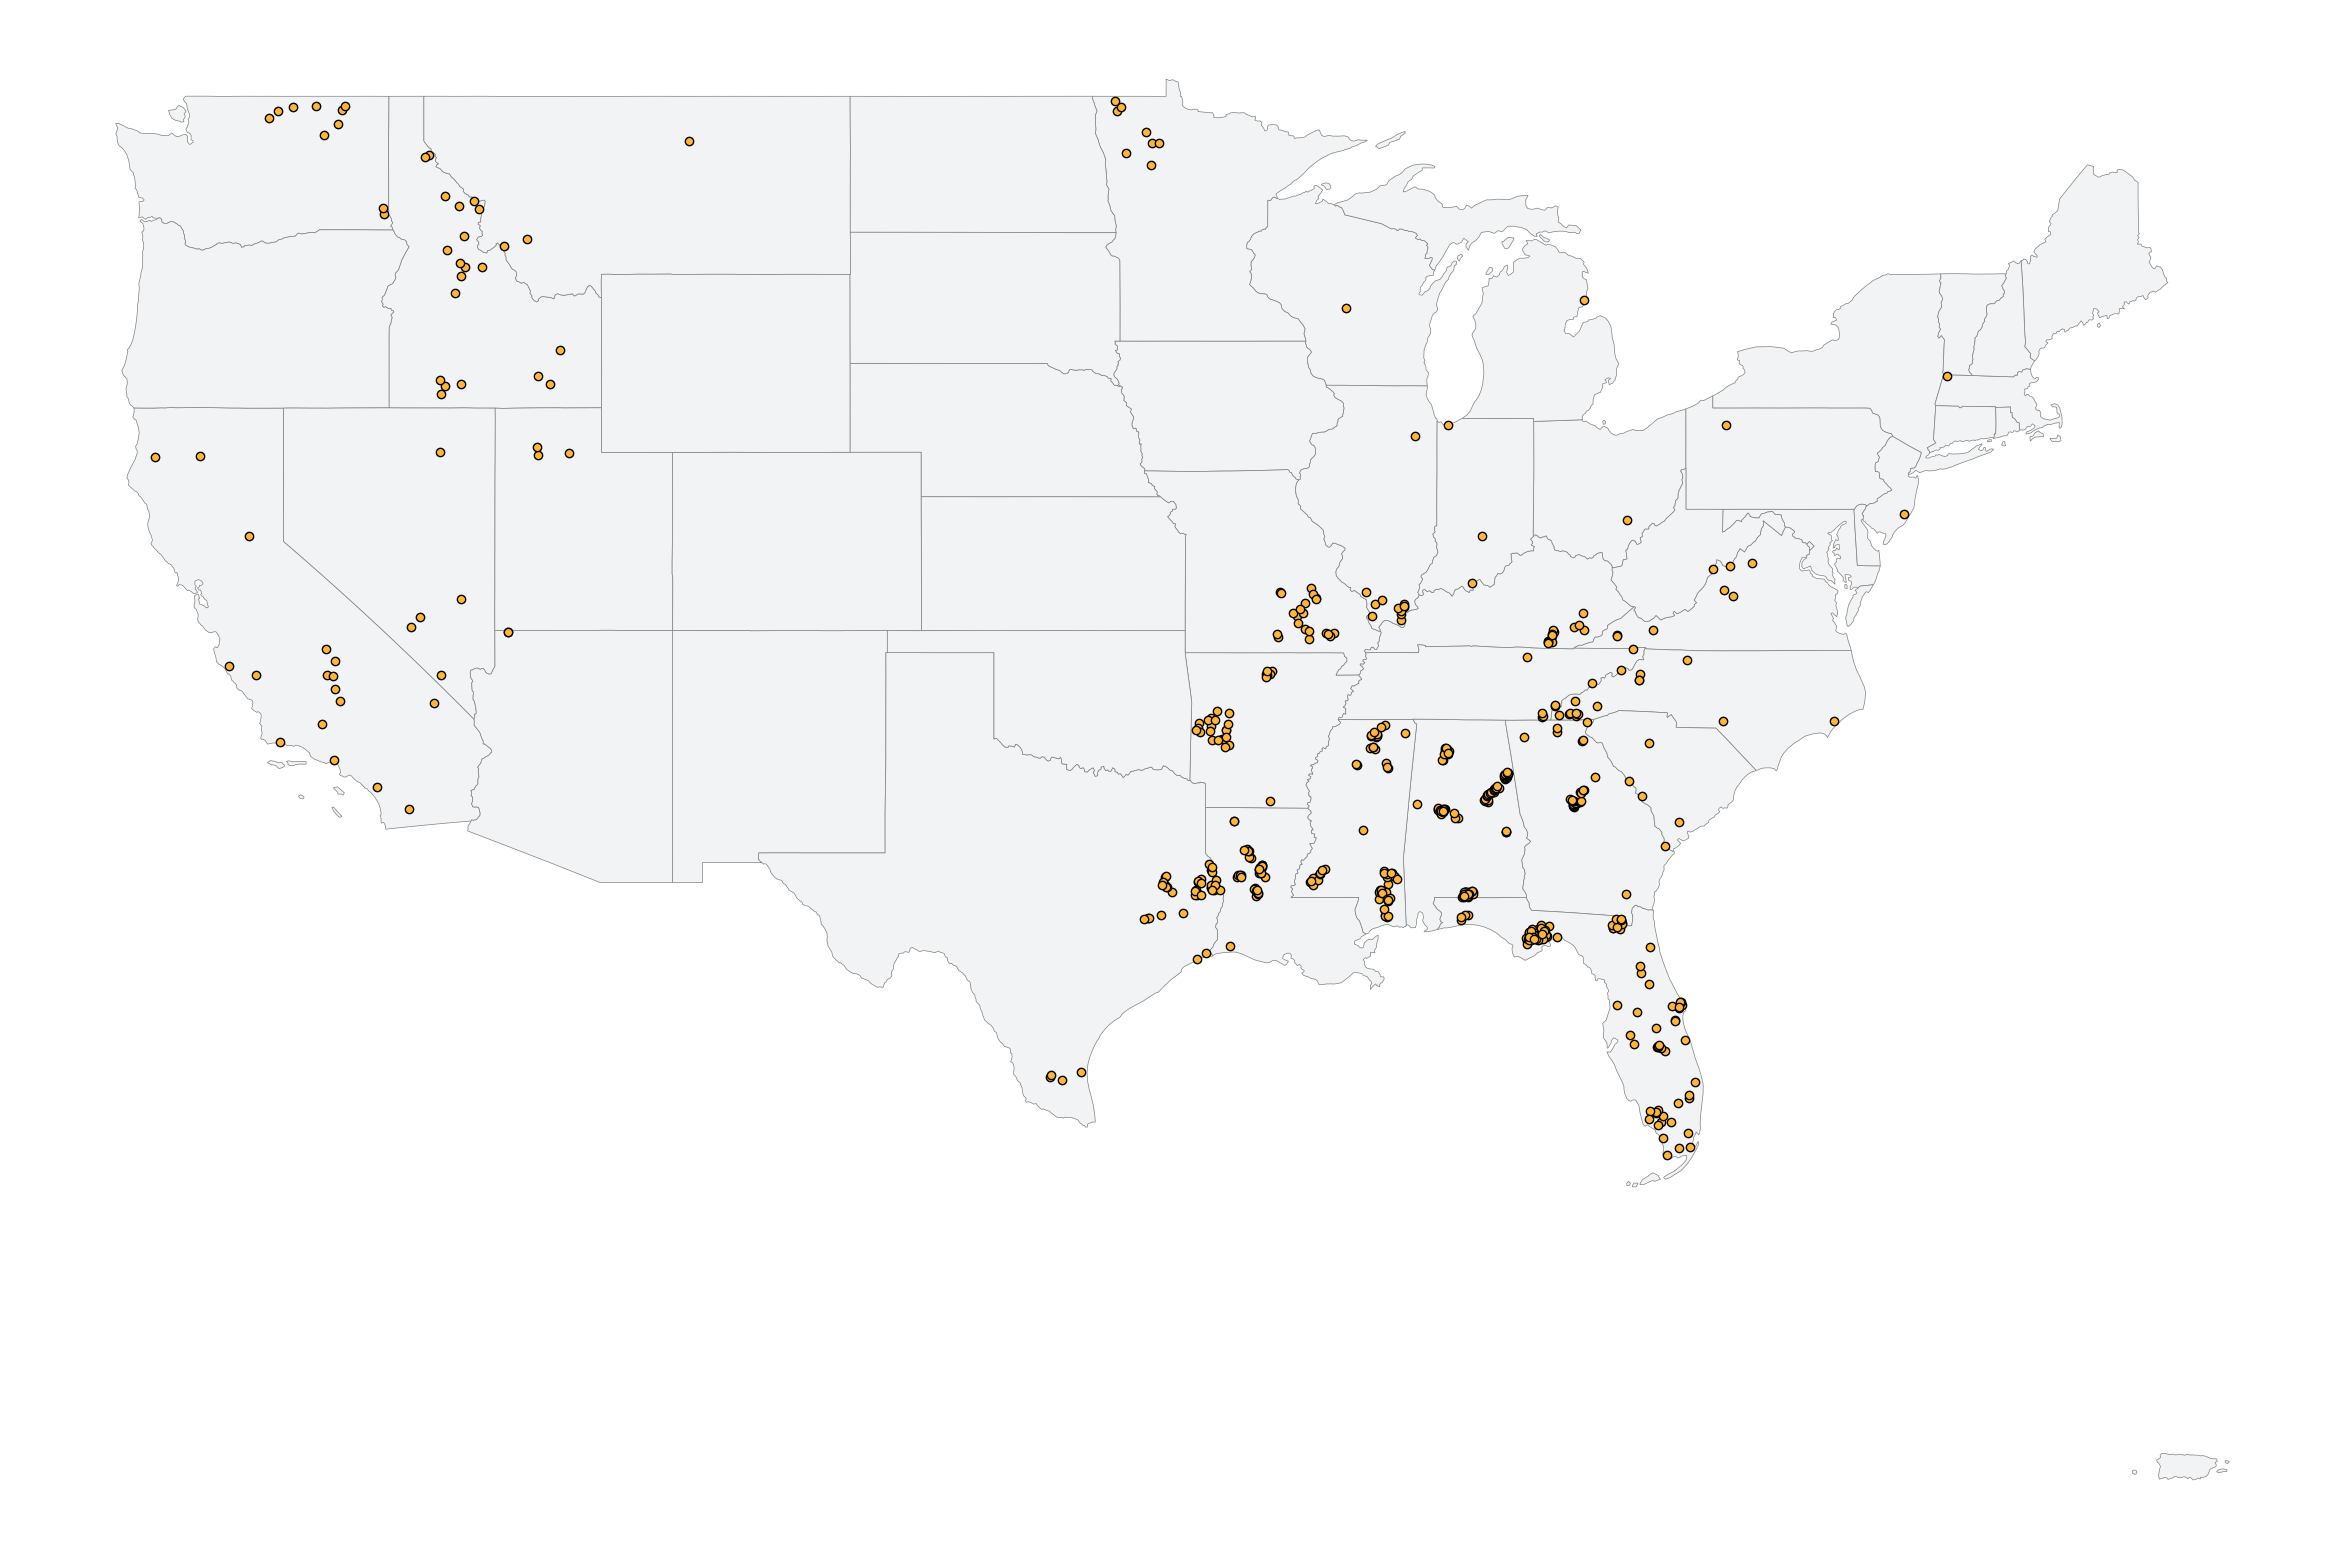

In [12]:
# ALternative gspatial_plot code
ax = gsp.shapeplot(states, figsize=(30,30))
gsp.pointplot(fires, ax=ax)

In [13]:
## 1.Do a spatial join on two datasets such that each fire occurance has state information[Look for sjoin in GeoPandas documentation]
##Answer: Right Outer Join

In [14]:
df = states.sjoin(fires,how="right")
df

,index_left,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,...,IG_DATE,ACRES,IRWINID,MAP_ID,MAP_PROG,PERIM_ID,DNBR_OFFST,DNBR_STDDV,COMMENTS,geometry
0,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,...,2021-03-20 00:00:00+00:00,1966,F512DED1-3A47-40F9-AA5C-AA8ECB5555E5,10021865,MTBS,NaN,34,17,NaN,POINT (-86.94711 32.77450)
1,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,...,2021-11-20 00:00:00+00:00,578,D7A20B61-04AA-42FE-ABCA-865F129167EE,10022026,MTBS,NaN,65,31,AL3277908698120211116 is a duplicate of this f...,POINT (-87.00658 32.78629)
2,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,...,2021-03-21 00:00:00+00:00,1313,9ECE2635-8788-4E37-91A7-82FA3C45EEEA,10021855,MTBS,NaN,-12,20,NaN,POINT (-87.05778 32.90670)
3,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,...,2021-04-19 00:00:00+00:00,1826,E18DFB2D-271E-4ECE-953A-B7BC5CFE6718,10021921,MTBS,NaN,-8,15,NaN,POINT (-86.08856 33.14911)
4,8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,...,2021-11-19 00:00:00+00:00,670,CB27E9BA-2B5D-4128-B92B-A38AE1246C81,10021983,MTBS,NaN,25,31,NaN,POINT (-86.18762 33.15883)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,...,2021-07-13 00:00:00+00:00,54855,BE99D67C-9EF1-4674-91E9-8F97B77EAFCC,10022602,MTBS,NaN,4,43,Perimeter delineated by using the following im...,POINT (-118.46878 48.38700)
543,6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,...,2021-07-08 00:00:00+00:00,58591,46E71AE7-7787-48B3-B584-9D63F43FA071,10022517,MTBS,NaN,-21,29,Perimeter delineated by using the following im...,POINT (-120.40964 48.51406)
544,27,30,00767982,0400000US30,30,MT,Montana,00,376962738765,3869208832,...,2021-07-08 00:00:00+00:00,62432,07C75421-ED46-4D0C-90A7-9B89F6C80A9B,10022470,MTBS,NaN,8,19,NaN,POINT (-113.78182 45.62594)
545,6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,...,2021-07-16 00:00:00+00:00,74601,A0A9789D-7AC2-4784-8AD3-B348CF5E64DD,10022491,MTBS,NaN,-17,42,Following perimeter images were applied: 80450...,POINT (-120.16256 48.66630)


In [15]:
## 2.Which state had the most number of fires?
##Answer: Alabama,95

In [16]:
state_fire_counts = df['NAME'].value_counts()
state_fire_counts

Alabama           95
Florida           92
Mississippi       67
Texas             42
Louisiana         35
Georgia           28
Arkansas          28
Missouri          21
Idaho             20
California        17
North Carolina    16
Kentucky          13
Illinois          12
Washington        10
Tennessee          8
Minnesota          8
Virginia           6
South Carolina     5
Nevada             5
Utah               3
Indiana            3
Montana            3
Arizona            2
West Virginia      2
Pennsylvania       1
New Jersey         1
Ohio               1
Wisconsin          1
Massachusetts      1
Michigan           1
Name: NAME, dtype: int64

In [17]:
## 3.Which state had the least number of fires?
##Answer: Pennsylvania,1 | New Jersey,1 | Ohio,1 | Wisconsin,1 | Massachusetts,1 | Michigan,1

In [18]:
state_fire_counts = df['NAME'].value_counts().sort_values()
state_fire_counts

Michigan           1
Wisconsin          1
Ohio               1
New Jersey         1
Pennsylvania       1
Massachusetts      1
West Virginia      2
Arizona            2
Montana            3
Indiana            3
Utah               3
Nevada             5
South Carolina     5
Virginia           6
Minnesota          8
Tennessee          8
Washington        10
Illinois          12
Kentucky          13
North Carolina    16
California        17
Idaho             20
Missouri          21
Arkansas          28
Georgia           28
Louisiana         35
Texas             42
Mississippi       67
Florida           92
Alabama           95
Name: NAME, dtype: int64

In [19]:
## 4.Is there any relationship between number of fires vs total water area(AWATER)?
##Answer: There is no specific relationship between number of fires vs total water area(AWATER)

<Axes: xlabel='NAME,AWATER', ylabel='Number of Fires'>

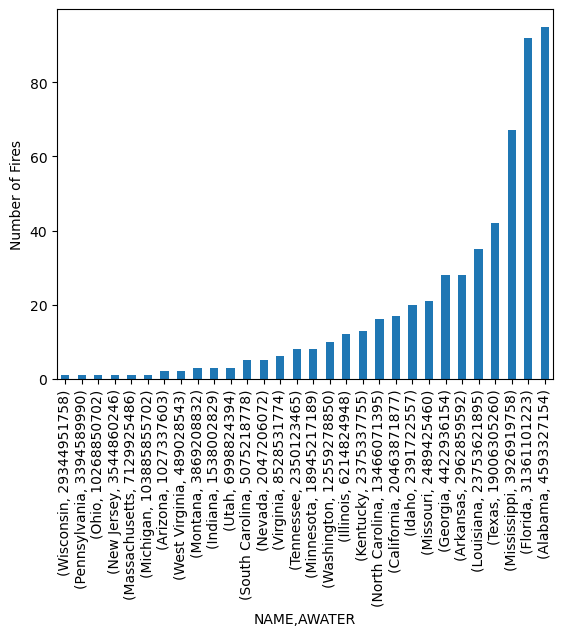

In [20]:
rel_nfires_awater = df.groupby('NAME')['AWATER'].value_counts().sort_values().plot(kind='bar',ylabel='Number of Fires')
rel_nfires_awater

In [21]:
## 5.Plot a heatmap of fires(You can use gspatial_plot or geopandas or any other library)

In [22]:
## 6.Plot a density map of fire occurences(You can use gspatial_plot or seaborn or any other library)

In [24]:
## 7.Which state had the highest number of wildfires?(FIRE_TYPE column)
## Answer: Idaho,20

In [27]:
highest_wildfire_state = df[df['FIRE_TYPE']=='Wildfire'].groupby('NAME')['FIRE_TYPE'].value_counts().sort_values()
highest_wildfire_state

NAME            FIRE_TYPE
Arkansas        Wildfire      1
Georgia         Wildfire      1
South Carolina  Wildfire      1
Massachusetts   Wildfire      1
Virginia        Wildfire      1
Missouri        Wildfire      1
New Jersey      Wildfire      1
Alabama         Wildfire      2
Arizona         Wildfire      2
Tennessee       Wildfire      2
Utah            Wildfire      3
Kentucky        Wildfire      3
Louisiana       Wildfire      3
Montana         Wildfire      3
North Carolina  Wildfire      4
Mississippi     Wildfire      4
Nevada          Wildfire      5
Texas           Wildfire      6
Minnesota       Wildfire      8
Washington      Wildfire     10
California      Wildfire     17
Florida         Wildfire     18
Idaho           Wildfire     20
Name: FIRE_TYPE, dtype: int64

In [28]:
## 8.Which state had the highest number of acres burned?(ACRES column)
## Answer: Florida,297722

In [29]:
highest_forest_burned_state = df.groupby('NAME')['ACRES'].sum().sort_values()
highest_forest_burned_state

NAME
Pennsylvania         586
New Jersey           605
Massachusetts        964
Wisconsin            987
Ohio                1037
Michigan            1751
Indiana             3100
Arizona             3508
West Virginia       6056
South Carolina      7147
Virginia            9701
Utah                9705
Tennessee          10130
Illinois           13645
North Carolina     17775
Kentucky           21261
Minnesota          28975
Georgia            33972
Missouri           39664
Nevada             48828
Louisiana          59819
Arkansas           68282
Mississippi        90087
Montana           116779
Alabama           123042
Texas             128556
Idaho             253919
Washington        279740
California        280639
Florida           297722
Name: ACRES, dtype: int64

In [30]:
## 9.Which month had the highest number of fires?
## Answer: March(3),225

In [33]:
df['MONTH'] = pd.DatetimeIndex(df['IG_DATE']).month

In [34]:
highest_fire_month = df['MONTH'].value_counts().sort_values()
highest_fire_month

9       3
10      9
12     11
6      14
8      14
11     20
1      25
7      27
5      37
2      55
4     107
3     225
Name: MONTH, dtype: int64

In [35]:
## 10.Which state had the highest number of fires for the month in question 9?
## Answer: Mississippi,33

In [37]:
highest_fire_month_state = df[df['MONTH']==3].groupby('NAME')['MONTH'].value_counts().sort_values()
highest_fire_month_state

NAME            MONTH
Wisconsin       3         1
Utah            3         1
Ohio            3         1
Nevada          3         1
Indiana         3         1
Virginia        3         1
South Carolina  3         2
Minnesota       3         5
Tennessee       3         7
Kentucky        3         8
Illinois        3         9
North Carolina  3         9
Missouri        3        15
Louisiana       3        15
Texas           3        18
Georgia         3        19
Arkansas        3        23
Alabama         3        27
Florida         3        29
Mississippi     3        33
Name: MONTH, dtype: int64